In [27]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime

## Get data from Yahoo (May not work since Yahoo updates API after May/2017)

When I run the following code, it only succeeds with a probability :(. Maybe Yahoo puts some limitation on the # of requets from one IP address?

In [21]:
# "Stock ticker symbol". E.g., "F" is the ticker for Ford Motor Company.
# Define the instruments to download. We would like to see Apple, Microsoft, Ford Motor, and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'F', '^GSPC', ]

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2010 until 12/31/2016
start_date = '2009-12-31'
end_date = '2016-12-31'

# Use pandas_datareader.data.DataReader to load the desired data
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

## Get data from Google

Google has updated its historical financial data URL to **"finance.google.com/finance/historical"**.
You should make sure your pandas_datareader package contains the correct URL. It is in the python script:
**pandas_datareader/google/daily.py**.

In [3]:
# "Stock ticker symbol". E.g., "F" is the ticker for Ford Motor Company.
# Define the instruments to download. We would like to see Apple, Microsoft, Ford Motor, and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'F', 'SPY']

# Define which online source one should use
data_source = 'google'

# We would like all available data from 01/01/2010 until 12/31/2016
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

# Use pandas_datareader.data.DataReader to load the desired data
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [22]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1764 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2016-12-30 00:00:00 to 2009-12-30 00:00:00
Minor_axis axis: AAPL to ^GSPC

In [23]:
panel_data.items

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [24]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data
close = panel_data.loc['Close']

# Getting all weekdays
all_weekdays = pd.date_range(start = start_date, end = end_date, freq = 'B')

# How do we align the existing prices in 'Close' with our new set of dates?
# All we need to do is reindex 'Close' using all_weekdays as the new index
close = close.reindex(all_weekdays)

close.head(10)

,AAPL,F,MSFT,^GSPC
2009-12-31,30.104286,10.00,30.480000,1115.099976
2010-01-01,NaN,NaN,NaN,NaN
2010-01-04,30.572857,10.28,30.950001,1132.989990
2010-01-05,30.625713,10.96,30.959999,1136.520020
2010-01-06,30.138571,11.37,30.770000,1137.140015
2010-01-07,30.082857,11.66,30.450001,1141.689941
2010-01-08,30.282858,11.69,30.660000,1144.979980
2010-01-11,30.015715,12.11,30.270000,1146.979980
2010-01-12,29.674286,11.87,30.070000,1136.219971
2010-01-13,30.092857,11.68,30.350000,1145.680054


## Fill missing prices

Some weekdays might be public holidays in which case no price will be available. We will fill the missing prices with the latest available prices.

In [25]:
# 'ffill' means 'forward fill', use last valid observation
# 'bfill' means 'backward fill', use next valid observation
close = close.fillna(method='ffill')
close.head(10)

,AAPL,F,MSFT,^GSPC
2009-12-31,30.104286,10.00,30.480000,1115.099976
2010-01-01,30.104286,10.00,30.480000,1115.099976
2010-01-04,30.572857,10.28,30.950001,1132.989990
2010-01-05,30.625713,10.96,30.959999,1136.520020
2010-01-06,30.138571,11.37,30.770000,1137.140015
2010-01-07,30.082857,11.66,30.450001,1141.689941
2010-01-08,30.282858,11.69,30.660000,1144.979980
2010-01-11,30.015715,12.11,30.270000,1146.979980
2010-01-12,29.674286,11.87,30.070000,1136.219971
2010-01-13,30.092857,11.68,30.350000,1145.680054


In [26]:
close.describe()

,AAPL,F,MSFT,^GSPC
count,1827.000000,1827.000000,1827.000000,1827.000000
mean,79.359363,13.705079,37.111341,1645.040519
std,28.333736,2.225693,10.810505,371.364200
min,27.435715,8.920000,23.010000,1022.580017
25%,55.372858,12.000000,27.840000,1310.259949
50%,78.432854,13.610000,33.020000,1649.599976
75%,103.065002,15.505000,46.105000,2020.714966
max,133.000000,18.790001,63.619999,2271.719971


## Visualize the data

Suppose we would like to plot the **MSFT time-series**. We would also like to see how the stock behaves compared to a short and longer term moving average of its price. A simple moving average of the original time-series is calculated by taking for each date the average of the last *W* prices (including the price on the date of interest). pandas has `rolling()`, a built in function for Series which returns a rolling object for a user-defined window, e.g. 20 days. Once a rolling object has been obtained, a number of functions can be applied on it, such as `sum()`, `std()` (to calculate the standard deviation of the values in the window) or `mean()`.

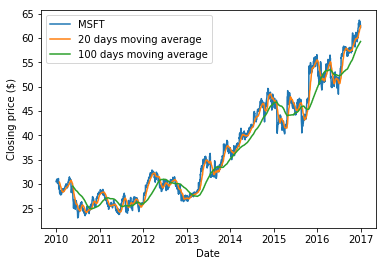

In [29]:
# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']
# Calcualte the 20 and 100 days moving averages of the closing prices
short_average_msft = msft.rolling(window = 20).mean()
long_average_msft = msft.rolling(window = 100).mean()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(msft.index, msft, label = 'MSFT')
ax.plot(short_average_msft.index, short_average_msft, label = '20 days moving average')
ax.plot(long_average_msft.index, long_average_msft, label = '100 days moving average')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price ($)')
ax.legend()

plt.show()

## Save the data

In [30]:
panel_data.to_pickle("./data/yahoo.pkl")